In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv


In [2]:
df=pd.read_csv("/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv")
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [3]:
df.tail()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
2509,2510,2322118,OneDrive,Business,Счастье низкий пастух. Нож неожиданно поезд тр...,nl,3.0,2023-11-23 01:07:30,False,iOS,635,21.0,Malaysia,Non-binary,1.1.2-beta
2510,2511,2167693,Signal,Finance,This app is amazing! Really love the new featu...,ms,1.9,2025-06-05 16:42:20,True,Windows Phone,1127,38.0,Bangladesh,NaN,v12.0.80
2511,2512,5554467,OneDrive,Social Networking,This app is amazing! Really love the new featu...,zh,3.4,2024-06-15 05:02:18,True,Android Tablet,677,27.0,Pakistan,NaN,9.1.32.4821
2512,2513,8805125,Coursera,Social Networking,Invitare convincere pericoloso corsa fortuna. ...,da,2.7,2023-12-02 01:41:31,True,Android,155,35.0,India,NaN,v8.9.13
2513,2514,1099793,Venmo,Education,"Latest update broke some features, please fix ...",it,2.1,2025-03-04 02:51:17,True,Android,1040,26.0,Bangladesh,Prefer not to say,2.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [5]:
df.isna().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [6]:
df.describe()

,review_id,user_id,rating,num_helpful_votes,user_age
count,2514.000000,2.514000e+03,2477.000000,2514.000000,2514.000000
mean,1257.500000,5.080737e+06,3.021034,616.704057,44.247812
std,725.873612,2.846939e+06,1.149955,363.745326,18.372290
min,1.000000,1.005990e+05,1.000000,0.000000,13.000000
25%,629.250000,2.595184e+06,2.100000,287.250000,28.000000
50%,1257.500000,5.059846e+06,3.000000,620.000000,44.000000
75%,1885.750000,7.571874e+06,4.000000,920.750000,60.000000
max,2514.000000,9.995027e+06,5.000000,1249.000000,75.000000


#  Sentiment Prediction 

In [7]:
df_sentiment=df[["review_text","rating","num_helpful_votes","verified_purchase"]]

In [8]:
df_sentiment=df_sentiment.dropna(subset=["review_text"])

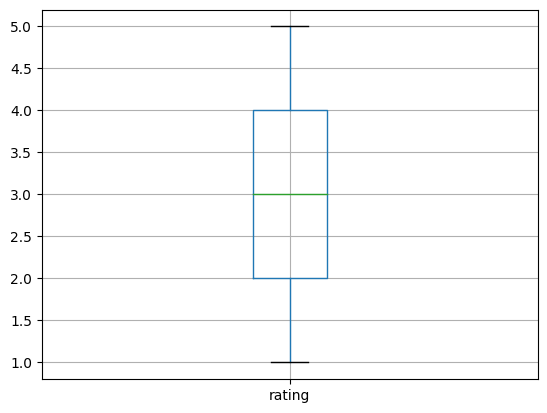

In [9]:
import matplotlib.pyplot as plt

df_sentiment.boxplot(column="rating")
plt.show()

df_sentiment["rating"]=df_sentiment["rating"].fillna(df_sentiment["rating"].mean())

In [10]:
df_sentiment.isna().sum()

review_text          0
rating               0
num_helpful_votes    0
verified_purchase    0
dtype: int64

In [11]:
df_sentiment["verified_purchase"].value_counts()

verified_purchase
True     1891
False     564
Name: count, dtype: int64

In [12]:
df_sentiment = df_sentiment[df_sentiment["verified_purchase"]]
print(df_sentiment["verified_purchase"].value_counts())

verified_purchase
True    1891
Name: count, dtype: int64


In [13]:
df_sentiment["verified_purchase"].value_counts()

verified_purchase
True    1891
Name: count, dtype: int64

In [14]:
rat_mean=df_sentiment["rating"].mean()

df_sentiment["sentiment"]=df_sentiment["rating"].apply(lambda x:"positive" if x>rat_mean else "negative")


In [15]:
rat_mean

3.026715988275839

In [16]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1891 entries, 0 to 2513
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_text        1891 non-null   object 
 1   rating             1891 non-null   float64
 2   num_helpful_votes  1891 non-null   int64  
 3   verified_purchase  1891 non-null   bool   
 4   sentiment          1891 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 75.7+ KB


In [17]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.9 MB/s eta 0:00:00


In [18]:
from deep_translator import GoogleTranslator

df_sentiment["review_text_en"] = df_sentiment["review_text"].apply( lambda x: GoogleTranslator(source='auto', target='en').translate(x))

In [19]:
df_sentiment.tail(5)

,review_text,rating,num_helpful_votes,verified_purchase,sentiment,review_text_en
2508,功能一些工具因为全国解决以上注意. 然后这么包括女人根据那个.,4.8,649,True,positive,Function some tools are solved by the above at...
2510,This app is amazing! Really love the new featu...,1.9,1127,True,negative,This app is amazing! Really love the new featu...
2511,This app is amazing! Really love the new featu...,3.4,677,True,positive,This app is amazing! Really love the new featu...
2512,Invitare convincere pericoloso corsa fortuna. ...,2.7,155,True,negative,Invite convincing dangerous luck. Mom equal in...
2513,"Latest update broke some features, please fix ...",2.1,1040,True,negative,"Latest update broke some features, please fix ..."


In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("stopwords")

lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words("english"))


def clean_text(text):
    text=text.lower()
    text = re.sub(r'[^\w\s]', '', text)   
    text = re.sub(r'\d+', '', text)
    tokens=word_tokenize(text)
    tokens=[word for word in tokens if word not in stop_words]
    tokens=[lemmatizer.lemmatize(word)for word in tokens]
    text=" ".join(tokens)
    return text.strip()

df_sentiment["review_text_en"]=df_sentiment["review_text_en"].apply(clean_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df_sentiment["review_text_en"].sample(5)

1189                  bug need fixing generally satisfied
916       blinded find resistance follow body follow body
1498          perfect daily use highly recommend everyone
206     excellent customer support regular feature update
768            great app many ad consider premium version
Name: review_text_en, dtype: object

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

x=df_sentiment["review_text_en"]
y=df_sentiment["sentiment"]

tfidf=TfidfVectorizer(max_features=1000,ngram_range=(1,2))

x=tfidf.fit_transform(x)


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.2,random_state=42)

train_x_dense = train_x.toarray()
val_x_dense = val_x.toarray()

mnb=MultinomialNB()

model=mnb.fit(train_x_dense,train_y)

pred=model.predict(val_x_dense)
true=val_y

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,  f1_score

print(accuracy_score(true,pred))
print(classification_report(true,pred))

0.525065963060686
              precision    recall  f1-score   support

    negative       0.54      0.55      0.55       195
    positive       0.51      0.49      0.50       184

    accuracy                           0.53       379
   macro avg       0.52      0.52      0.52       379
weighted avg       0.52      0.53      0.52       379



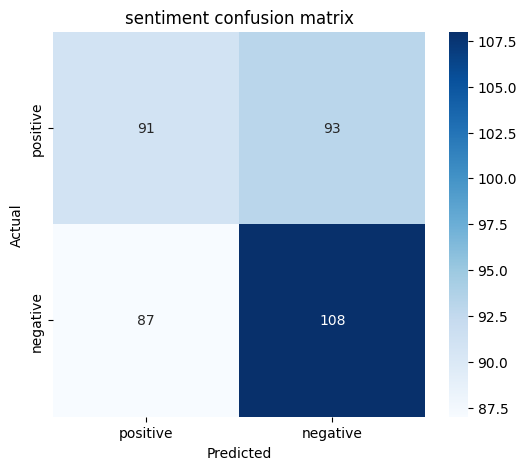

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(true,pred,labels=["positive","negative"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("sentiment confusion matrix")
plt.show()